In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv('breast_cancer_analysis_data.csv')

In [4]:
# Check for total missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If you want only columns with missing values:
print("Columns with missing values:\n", missing_values[missing_values > 0])


Missing values in each column:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Columns with missing values

In [5]:
print(df.shape)
print(df.head())
print(df.info())

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

# Instantiate
le = LabelEncoder()

# Fit on your categorical column and transform
# e.g., creating a numeric target from 'diagnosis'
df['diagnosis_result'] = le.fit_transform(df['diagnosis'])


In [8]:
# Compute correlation of all features with the target
correlations = df.corr(numeric_only=True)['diagnosis_result'].drop('diagnosis_result').sort_values(ascending=False)
# Filter features with correlation in the range 0.7–0.9 or -0.7–-0.9
selected_features = correlations[(abs(correlations) >= 0.7) & (abs(correlations) <= 0.9)]
# Display the correlations
print("Correlation of features with the target:")
print(correlations)
print("Features with correlation between ±0.7 and ±0.9 with the target:")
print(selected_features)

Correlation of features with the target:
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                     

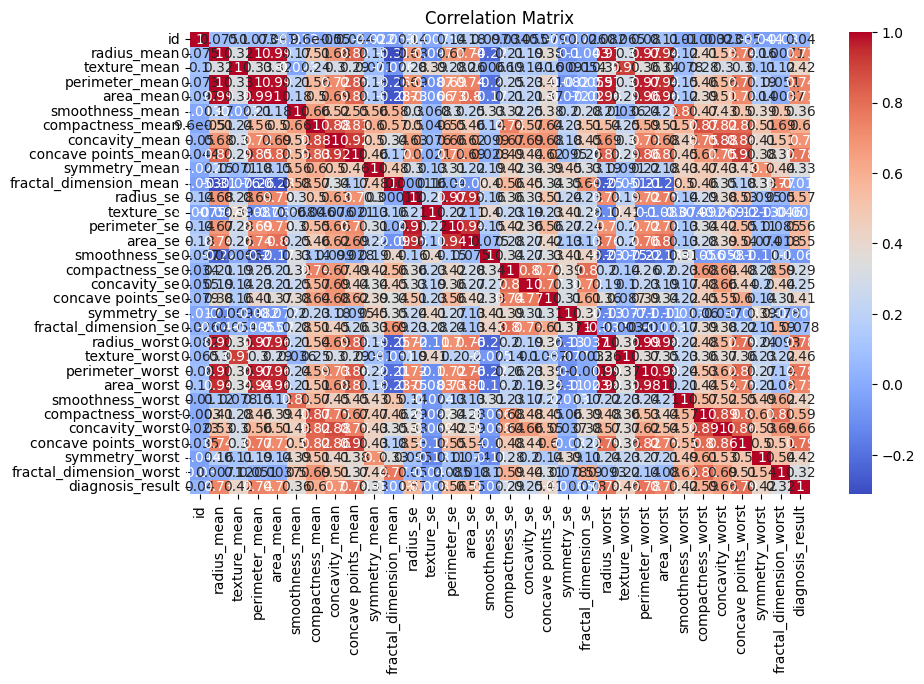

In [9]:
# correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
df = df.drop(columns=['id'])

In [11]:
df=df.drop(columns=['diagnosis'])

In [12]:
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[~((df< (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (569, 31)
After removing outliers: (398, 31)


In [13]:
df_no_outliers

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_result
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,1
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,1
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242,0
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283,0
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,0
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321,0


<h2> Univariable analysis </h2>

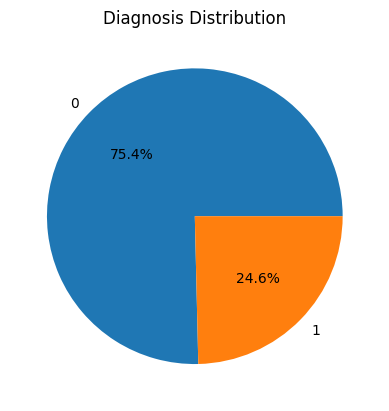

In [14]:
# Pie chart: diagnosis distribution
plt.figure()
counts =df_no_outliers['diagnosis_result'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Diagnosis Distribution')
plt.show()

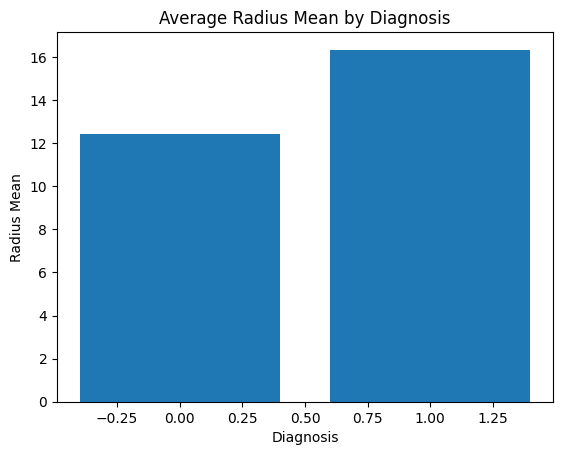

In [15]:
# Bar chart: average radius_mean by diagnosis
plt.figure()
mean_radius = df_no_outliers.groupby('diagnosis_result')['radius_mean'].mean()
plt.bar(mean_radius.index, mean_radius.values)
plt.title('Average Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

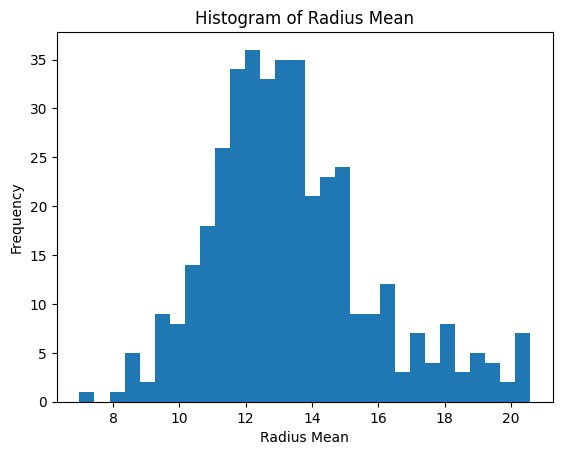

In [16]:
# Histogram: radius_mean
plt.figure()
plt.hist(df_no_outliers['radius_mean'], bins=30)
plt.title('Histogram of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

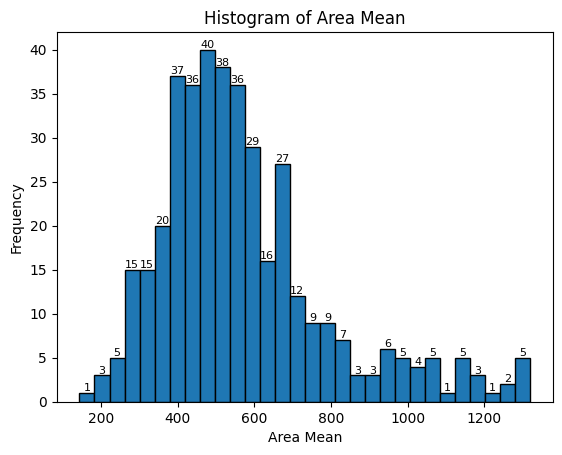

In [17]:
# Histogram: area_mean, with bar counts labeled
plt.figure()
n2, bins2, patches2 = plt.hist(df_no_outliers['area_mean'], bins=30, edgecolor='black')
plt.title('Histogram of Area Mean')
plt.xlabel('Area Mean')
plt.ylabel('Frequency')

for count, edge in zip(n2, bins2):
    plt.text(edge + (bins2[1]-bins2[0])/2, count, 
             f'{int(count)}', 
             ha='center', va='bottom', fontsize=8)

plt.show()

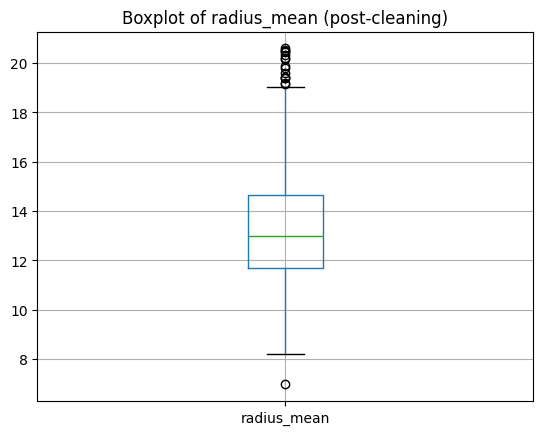

In [18]:
import matplotlib.pyplot as plt
# for example, boxplot of radius_mean
plt.figure()
df_no_outliers.boxplot(column='radius_mean')
plt.title('Boxplot of radius_mean (post-cleaning)')
plt.show()


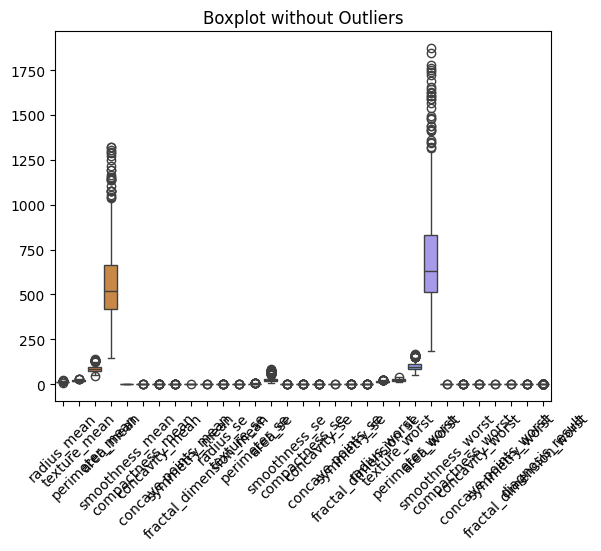

In [19]:
import seaborn as sns

# Create a boxplot for the cleaned data
sns.boxplot(data=df_no_outliers)

# Add title
plt.title('Boxplot without Outliers')
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [20]:
df_cleaned=df_no_outliers

In [21]:
from sklearn.model_selection import train_test_split

# Assume df is your DataFrame and 'target' is the column you're trying to predict
x= df_cleaned.drop(columns='diagnosis_result')  # Features
y = df_cleaned['diagnosis_result']  # Target variable

In [22]:
def perform_pca(data,variance_threshold=0.95):
    '''
    perform PCA and selec components thet explain specified variance threshold
    parameters:
    data: DataFrame containing the features
    variance_threshold:float,default 0.95(95%)

    returns:
    DataFrame containing the selected principal components
    '''
    # standardized the data
    scaler = StandardScaler()
    numerical_df=x.select_dtypes(include=[np.number])
    scaled_data = scaler.fit_transform(numerical_df)
    
    # perform PCA
    pca=PCA()
    pca.fit(scaled_data)

    #calculate cumulative explained variance
    cumulative_variance=np.cumsum(pca.explained_variance_ratio_)

    
    #find number of components needed to reach variance threshold
    n_components=np.argmax(cumulative_variance>=variance_threshold)+1

    #performa PCA with selected numbers of components
    pca=PCA(n_components=n_components)
    principal_components=pca.fit_transform(scaled_data)

    #create column names for the new dataframe
    pc_columns=[f'PC{i+1}' for i in range(n_components)]

    #create new dataframe with principal components
    pc_df = pd.DataFrame(principal_components, columns=pc_columns)

    
    #print variance explained by each component
    print(f"Number of components selected:{n_components}")
    print("\nVariance explained by each components:")
    for i,var in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}:{var:.4f} ({var*100:.2f}%)")

    print(f"\nTotal Variance explained:{cumulative_variance[n_components-1]*100:.2f}%")
    
    return pc_df

In [23]:
# example usage:
if __name__=="__main__":
    data=pd.read_csv("breast_cancer_analysis_data.csv")
    pc_df=perform_pca(x)

   #save the new dataframe
    pc_df.to_csv('Breast_cancer_PCA_DATASET.csv',index=False)

Number of components selected:10

Variance explained by each components:
PC1:0.4253 (42.53%)
PC2:0.1870 (18.70%)
PC3:0.1004 (10.04%)
PC4:0.0639 (6.39%)
PC5:0.0632 (6.32%)
PC6:0.0404 (4.04%)
PC7:0.0271 (2.71%)
PC8:0.0177 (1.77%)
PC9:0.0155 (1.55%)
PC10:0.0114 (1.14%)

Total Variance explained:95.18%


In [24]:
df_pca=pd.read_csv('Breast_cancer_PCA_DATASET.csv')

In [25]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,5.927067,-3.505417,-1.262764,0.918328,0.253334,-0.212554,0.537035,0.289970,0.166103,-0.063746
1,5.157012,4.175216,0.292621,1.952160,0.483912,-0.974573,2.663737,-0.756233,-0.267848,1.077529
2,1.173013,-3.408498,0.414729,-0.264824,1.803123,0.116081,1.676595,0.308689,0.787821,-0.138644
3,6.369327,0.739285,-0.732368,0.143661,-0.210606,1.658567,1.718025,1.021147,-0.201568,-0.475332
4,2.786797,-0.666649,3.394382,-0.267920,-1.023933,1.203931,-2.657474,1.050990,0.367212,0.048985
...,...,...,...,...,...,...,...,...,...,...
393,-1.227809,-0.492335,1.924704,-2.081473,2.673467,-0.446631,-1.081749,0.955367,-0.126839,0.569004
394,-1.312859,3.358014,3.767157,-2.276278,2.284509,-1.889649,-1.727774,0.480688,-0.258795,0.684729
395,2.239110,0.644470,0.955765,-4.653671,-0.726167,0.523729,-0.689246,-0.846715,0.049389,-0.418478
396,1.294735,0.715172,2.686516,-1.274098,0.989656,-1.108669,0.619306,-0.589911,1.171756,-0.443271


In [26]:
df_pca.isnull().sum()

PC1     0
PC2     0
PC3     0
PC4     0
PC5     0
PC6     0
PC7     0
PC8     0
PC9     0
PC10    0
dtype: int64

In [27]:

df_pca['diagnosis_result'] = y  # Reattach the target column

In [28]:

# to train the model in regression(linear)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 30)
(80, 30)
(318,)
(80,)


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 245, 1: 73})
After SMOTE: Counter({1: 245, 0: 245})


<h3> scaleing </h3>

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Scale features after SMOTE
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)

# For test set, scale using the same scaler:
x_test_scaled = scaler.transform(x_test)


<h2> DECISION TREE for classification </h2>

In [32]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.metrics import classification_report,accuracy_score 

In [33]:
# Build and train the decision tree clasifier
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train_scaled,y_train_smote)

DecisionTreeClassifier(random_state=42)

In [34]:
# Predict and evaluate the model on the test data
y_pred=clf.predict(x_test_scaled)
accuracy_test=accuracy_score(y_test,y_pred)

In [35]:
accuracy_test

0.9125

In [36]:
# Classification report for test
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.93      0.95      0.94        55\n           1       0.88      0.84      0.86        25\n\n    accuracy                           0.91        80\n   macro avg       0.90      0.89      0.90        80\nweighted avg       0.91      0.91      0.91        80\n'

In [37]:
# Predict and evaluate the model on the train data
y_pred=clf.predict(x_train_scaled)
accuracy_train=accuracy_score(y_train_smote,y_pred)

In [38]:
accuracy_train

1.0

In [39]:
# Classification report train
report=classification_report(y_train_smote,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       245\n           1       1.00      1.00      1.00       245\n\n    accuracy                           1.00       490\n   macro avg       1.00      1.00      1.00       490\nweighted avg       1.00      1.00      1.00       490\n'

<h2>Hyper parameter tuning to prevent the overfiting ESENTIAL TUNING PAAMETER IN DECISION TREE:</h2>

In [40]:
#--- Gridsearch is an optimization tecqunic ---#
from sklearn.model_selection import GridSearchCV
import numpy as np

# HYPERPARAMETER TUNING USING GridSearchCV (Cross validation)
param_grid={
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid,cv=5,
                         scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train_scaled,y_train_smote)

# Best model from grid search
best_clf=grid_search.best_estimator_


In [41]:
y_pred_best_test=best_clf.predict(x_test_scaled)
y_pred_best_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [42]:
# Evaluate the tuned model
accuracy_best=accuracy_score(y_test,y_pred_best_test)
report_best=classification_report(y_test,y_pred_best_test)

print("accuracy_best_test:",accuracy_best)
print("report_best_test:",report_best)

accuracy_best_test: 0.9125
report_best_test:               precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.88      0.84      0.86        25

    accuracy                           0.91        80
   macro avg       0.90      0.89      0.90        80
weighted avg       0.91      0.91      0.91        80



In [43]:
# train
y_pred_best_train=best_clf.predict(x_train_scaled)
y_pred_best_train

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [44]:
# Evaluate the tuned model
accuracy_best=accuracy_score(y_train_smote,y_pred_best_train)
report_best=classification_report(y_train_smote,y_pred_best_train)

print("accuracy_best_train:",accuracy_best)
print("report_best_train:",report_best)

accuracy_best_train: 0.9918367346938776
report_best_train:               precision    recall  f1-score   support

           0       1.00      0.98      0.99       245
           1       0.98      1.00      0.99       245

    accuracy                           0.99       490
   macro avg       0.99      0.99      0.99       490
weighted avg       0.99      0.99      0.99       490



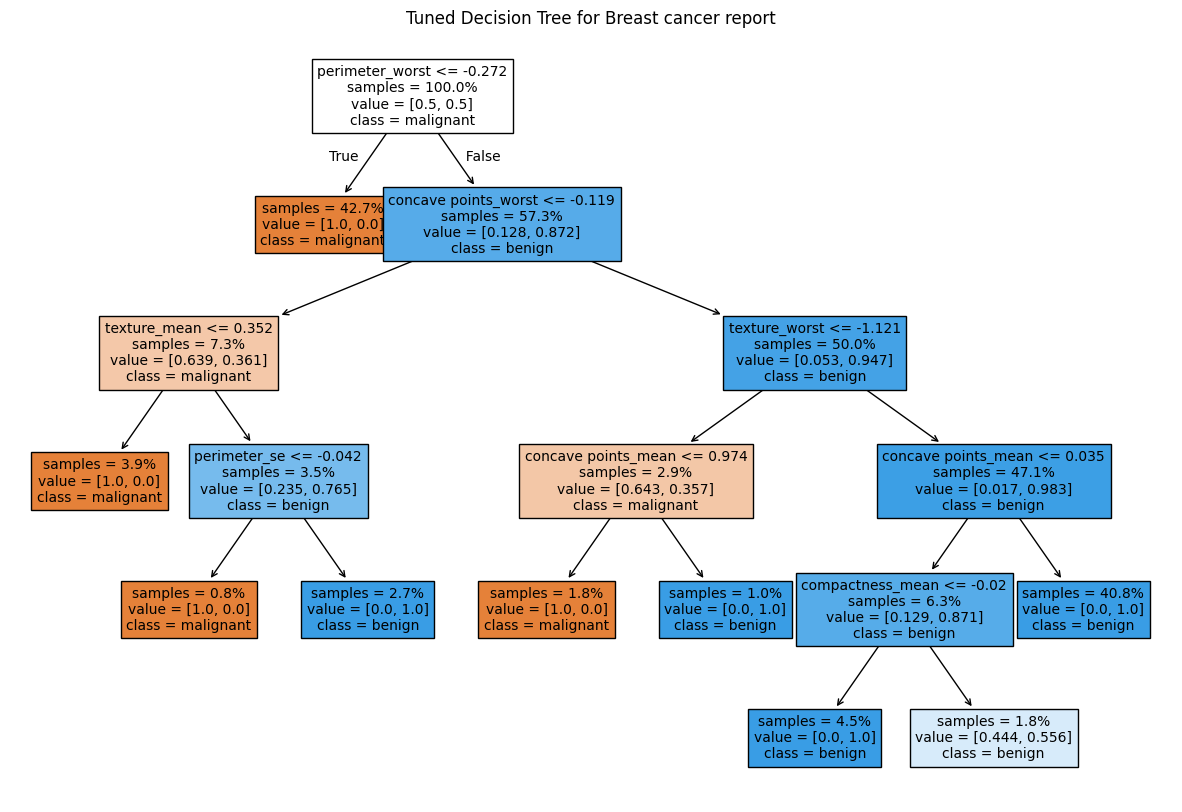

In [45]:
# plot the decision tree with tuned hyperparameters
plt.figure(figsize=(15,10))
plot_tree(best_clf,feature_names=x.columns,
          class_names=['malignant','benign'],
          filled=True,fontsize=10,proportion=True,impurity=False)
plt.title("Tuned Decision Tree for Breast cancer report")
plt.show()

🔹 Definitions:
Precision: Of all predicted as class X, how many were correct?

E.g., for class 1: 95% of predicted malignant cases were actually malignant.

Recall: Of all actual class X cases, how many were correctly predicted?

E.g., for class 1: 92% of actual malignant cases were correctly detected.

F1-Score: Harmonic mean of precision and recall — balances both.

Support: Number of true instances for each class.



<h2> Random forest classifier </h2>

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
# Build and train the Randomforestclasifier
clf=RandomForestClassifier(random_state=20)
clf.fit(x_train_scaled,y_train_smote)

RandomForestClassifier(random_state=20)

<h2> HYPER PARAMETER TUNEING </H2>

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the RandomForestClassifier
rfclf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfclf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(x_train_scaled, y_train_smote)

# Get the best model from grid search
best_rfclf = grid_search.best_estimator_



In [49]:
# test
y_pred_best_test=best_rfclf.predict(x_test_scaled)
y_pred_best_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [50]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_test) 
cm

array([[52,  3],
       [ 3, 22]])

In [51]:
# Evaluate the tuned model
accuracy_best=accuracy_score(y_test,y_pred_best_test)
report_best=classification_report(y_test,y_pred_best_test)

print("accuracy_best_test:",accuracy_best)
print("report_best_test:",report_best)

accuracy_best_test: 0.925
report_best_test:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.88      0.88      0.88        25

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80



In [52]:
# train
y_pred_best_train=best_rfclf.predict(x_train_scaled)
y_pred_best_train

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [53]:
# Generate the confusion matrix
cm = confusion_matrix(y_train_smote, y_pred_best_train) 
cm

array([[245,   0],
       [  0, 245]])

In [54]:
# Evaluate the tuned model train
accuracy_best=accuracy_score(y_train_smote,y_pred_best_train)
report_best=classification_report(y_train_smote,y_pred_best_train)

print("accuracy_best_train:",accuracy_best)
print("report_best_train:",report_best)

accuracy_best_train: 1.0
report_best_train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       245

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490



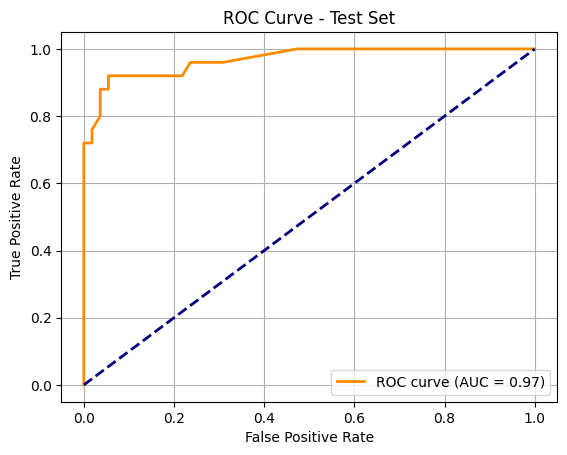

In [55]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC
y_scores = best_rfclf.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc="lower right")
plt.grid()
plt.show()


 Orange Line – ROC Curve
Plots the True Positive Rate (Recall) against the False Positive Rate for various classification thresholds.
The curve starts from (0,0) and ends at (1,1).
curve quickly rises to the top-left corner, meaning high TPR and low FPR — a very good sign.

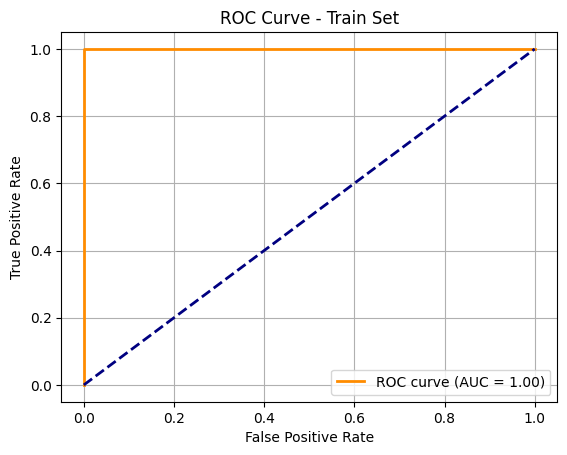

In [56]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC
y_scores = best_rfclf.predict_proba(x_train_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_smote, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set')
plt.legend(loc="lower right")
plt.grid()
plt.show()


<h3> logistic rregression </h3>

In [57]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()  # increase max_iter from 100 to 500
model_log.fit(x_train_scaled, y_train_smote)


LogisticRegression()

In [58]:
# Predict on train
y_train_pred=model_log.predict(x_train_scaled)

In [59]:
# probability for x_train
model_log.predict_proba(x_train_scaled)

array([[2.55567889e-05, 9.99974443e-01],
       [3.58117864e-03, 9.96418821e-01],
       [9.76109158e-01, 2.38908419e-02],
       [8.29189579e-01, 1.70810421e-01],
       [9.99999738e-01, 2.61980882e-07],
       [9.99995747e-01, 4.25260751e-06],
       [9.99051917e-01, 9.48083317e-04],
       [9.06078769e-01, 9.39212314e-02],
       [1.25281863e-04, 9.99874718e-01],
       [9.95620675e-01, 4.37932512e-03],
       [9.99924978e-01, 7.50219157e-05],
       [9.99969614e-01, 3.03861486e-05],
       [9.99616695e-01, 3.83305385e-04],
       [9.99901073e-01, 9.89268274e-05],
       [9.99999814e-01, 1.85734217e-07],
       [9.99986824e-01, 1.31755039e-05],
       [9.99999134e-01, 8.66206843e-07],
       [2.68607610e-06, 9.99997314e-01],
       [9.56478479e-01, 4.35215206e-02],
       [4.10886736e-03, 9.95891133e-01],
       [9.99994269e-01, 5.73148538e-06],
       [9.99999999e-01, 1.20923121e-09],
       [6.34242521e-01, 3.65757479e-01],
       [9.86943946e-01, 1.30560541e-02],
       [1.558991

In [60]:
y_train_pred=model_log.predict(x_train_scaled) # default threshold = 0.5

In [61]:
#probability of x_train
y_train_prob=model_log.predict_proba(x_train_scaled) 
y_train_pred=(y_train_prob[:,1]>=0.7).astype(int) # change threshold=0.7

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
#Evaluate the model in train data
train_cm=confusion_matrix(y_train_smote,y_train_pred)
train_report=classification_report(y_train_smote,y_train_pred)
roc_auc_train=roc_auc_score(y_train_smote,model_log.predict_proba(x_train_scaled)[:,1])
print(train_cm)
print(train_report)
print(roc_auc_train)

[[245   0]
 [  8 237]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       245
           1       1.00      0.97      0.98       245

    accuracy                           0.98       490
   macro avg       0.98      0.98      0.98       490
weighted avg       0.98      0.98      0.98       490

0.9997167846730529


In [63]:
# Predict on train
y_test_pred=model_log.predict(x_test_scaled)

In [64]:
# probability for x_test
model_log.predict_proba(x_test_scaled)

array([[9.99997749e-01, 2.25119114e-06],
       [9.70565434e-01, 2.94345661e-02],
       [3.53235837e-05, 9.99964676e-01],
       [9.98774422e-01, 1.22557814e-03],
       [9.99766258e-01, 2.33741548e-04],
       [9.33758754e-01, 6.62412462e-02],
       [9.99740006e-01, 2.59994052e-04],
       [9.99998355e-01, 1.64519197e-06],
       [1.03648219e-05, 9.99989635e-01],
       [7.59904240e-08, 9.99999924e-01],
       [9.99999876e-01, 1.23576873e-07],
       [9.55566364e-01, 4.44336362e-02],
       [9.99999973e-01, 2.66156816e-08],
       [9.90855376e-01, 9.14462434e-03],
       [7.23026554e-04, 9.99276973e-01],
       [9.98778234e-01, 1.22176586e-03],
       [9.99998783e-01, 1.21684099e-06],
       [9.99791289e-01, 2.08710694e-04],
       [4.99802404e-01, 5.00197596e-01],
       [9.96760583e-01, 3.23941690e-03],
       [9.53808692e-01, 4.61913083e-02],
       [2.36576673e-03, 9.97634233e-01],
       [9.99293976e-01, 7.06024270e-04],
       [2.02698615e-05, 9.99979730e-01],
       [8.104319

In [65]:
y_test_pred=model_log.predict(x_test_scaled) # default threshold = 0.5

In [66]:
#probability of x_train
y_test_prob=model_log.predict_proba(x_test_scaled) 
y_test_pred=(y_test_prob[:,1]>=0.7).astype(int) # change threshold=0.7

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
#Evaluate the model in train data
test_cm=confusion_matrix(y_test,y_test_pred)
test_report=classification_report(y_test,y_test_pred)
roc_auc_test=roc_auc_score(y_test,model_log.predict_proba(x_test_scaled)[:,1])

print(test_cm)
print(test_report)
print(roc_auc_test)

[[54  1]
 [ 4 21]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.95      0.84      0.89        25

    accuracy                           0.94        80
   macro avg       0.94      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80

0.976


In [70]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define the model
xgb_clf = xgb.XGBClassifier(random_state=42)


In [71]:

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# 3. RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(x_train_scaled, y_train_smote)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [72]:
# Best model
best_xgb = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)


Best Parameters:
 {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [73]:
#Training set evaluation
y_train_pred = best_xgb.predict(x_train_scaled)
print("Training Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train_smote, y_train_pred))

Training Accuracy: 1.0
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       245

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490



In [74]:
# 7. Test set evaluation
y_test_pred = best_xgb.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.9375
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.92      0.88      0.90        25

    accuracy                           0.94        80
   macro avg       0.93      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
 [[53  2]
 [ 3 22]]


In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Define the SVC model
svc = SVC(random_state=42)

# 2. Hyperparameter tuning grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# 3. RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 4. Fit on training data
random_search.fit(x_train_scaled, y_train_smote)

# 5. Best model
best_svc = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

# 6. Training set evaluation
y_train_pred = best_svc.predict(x_train_scaled)
print("Training Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train_smote, y_train_pred))

# 7. Test set evaluation
y_test_pred = best_svc.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:
 {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Training Accuracy: 1.0
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       245

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

Test Accuracy: 0.9375
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.92      0.88      0.90        25

    accuracy                           0.94        80
   macro avg       0.93      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
 [[53  2]
 [ 3 22]]


In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Instantiate the model
gnb = GaussianNB()

# 2. Fit on training data
gnb.fit(x_train_scaled, y_train_smote)

# 3. Training set evaluation
y_train_pred = gnb.predict(x_train_scaled)
print("Training Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train_smote, y_train_pred))

# 4. Test set evaluation
y_test_pred = gnb.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9469387755102041
Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       245
           1       0.93      0.96      0.95       245

    accuracy                           0.95       490
   macro avg       0.95      0.95      0.95       490
weighted avg       0.95      0.95      0.95       490

Test Accuracy: 0.9125
Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.85      0.88      0.86        25

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

Confusion Matrix:
 [[51  4]
 [ 3 22]]


In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instantiate the model (you can change n_neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Fit on training data
knn.fit(x_train_scaled, y_train_smote)

# 3. Training set evaluation
y_train_pred = knn.predict(x_train_scaled)
print("Training Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train_smote, y_train_pred))

# 4. Test set evaluation
y_test_pred = knn.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9673469387755103
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       245
           1       0.94      1.00      0.97       245

    accuracy                           0.97       490
   macro avg       0.97      0.97      0.97       490
weighted avg       0.97      0.97      0.97       490

Test Accuracy: 0.95
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.92      0.92      0.92        25

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80

Confusion Matrix:
 [[53  2]
 [ 2 23]]


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to store classification results
results = {}

# Dictionary of your trained classification models
models = {
    "KNN": knn,
    "Decision Tree": best_clf,
    "Random Forest": best_rfclf,
    "SVC": best_svc,
    "XGBoost": best_xgb,
    "GaussianNB": gnb
}

# Evaluate each model on test set
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

# Display results as a DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="F1 Score", ascending=False)
print("\nModel Performance Comparison:")
display(results_df.style.background_gradient(cmap='YlGnBu'))



Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score
KNN,0.950000,0.920000,0.920000,0.920000
SVC,0.937500,0.916667,0.880000,0.897959
XGBoost,0.937500,0.916667,0.880000,0.897959
Random Forest,0.925000,0.880000,0.880000,0.880000
GaussianNB,0.912500,0.846154,0.880000,0.862745
Decision Tree,0.912500,0.875000,0.840000,0.857143


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to store classification results
results = {}

# Dictionary of your untrained classification models
models = {
    "KNN ": knn,
    "Decision Tree": best_clf,
    "Random Forest": best_rfclf,
    "SVC": best_svc,
    "XGBoost": best_xgb,
    "GaussianNB": gnb
}

# Train and evaluate each model on train and test sets
for name, model in models.items():
    model.fit(x_train_scaled, y_train_smote)          # Train the model on training data
    y_pred = model.predict(x_train_scaled)       # Predict on test data
    
    acc = accuracy_score(y_train_smote, y_pred)
    prec = precision_score(y_train_smote, y_pred)
    rec = recall_score(y_train_smote, y_pred)
    f1 = f1_score(y_train_smote, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

# Display results as a DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="F1 Score", ascending=False)
print("\nModel Performance Comparison:")
display(results_df.style.background_gradient(cmap='YlGnBu'))



Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score
SVC,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000
Decision Tree,0.991837,0.983936,1.000000,0.991903
KNN,0.967347,0.938697,1.000000,0.968379
GaussianNB,0.946939,0.932806,0.963265,0.947791


In [82]:
import pickle

# After training your model:
with open('breast_cancer_analysis_GaussianNB.pkl', 'wb') as f:
    pickle.dump(gnb, f)